## Predicting the House Price using Advanced Regression Techniques (Random Forest and gradient boosting)

In this project, we'll be predicting house price from `Kaggle's` House price prediction using Regression models like `Random Forest` and `Gradient Boosting`

#### 1. Problem Definition
> How well we will be able to predict the house price given similar characteristics of past data?

#### 2. Data
Data is being download from Kaggle Competition:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### 3. Evaluation
 The evaluation metric for this competition is RMSE(Root-Mean-Squared-Error) between the logarithm of the predicted value and the logarithm of the observed sales price.(By taking logs the prediction of expensive houses and cheap houses will not affect the result equally).
 
#### 4. Features
You can find the detail data dictionary with all the features in the Kaggle from the link below:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Importing the data

In [52]:
housing_df = pd.read_csv(r'E:\DS\files\data\house-prices-advanced-regression-techniques\train.csv',index_col='Id')
housing_df[:2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
housing_df.shape

(1460, 80)

In [56]:
# Setup pandas to display all the columns
pd.options.display.max_columns =10
pd.options.display.max_rows = 10

In [57]:
housing_df.head(1).T

Id,1
MSSubClass,60
MSZoning,RL
LotFrontage,65
LotArea,8450
Street,Pave
...,...
MoSold,2
YrSold,2008
SaleType,WD
SaleCondition,Normal


In [4]:
housing_df.isna().sum()[housing_df.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [58]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [10]:
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
housing_df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Text(0.5, 0, 'Sale price of houses')

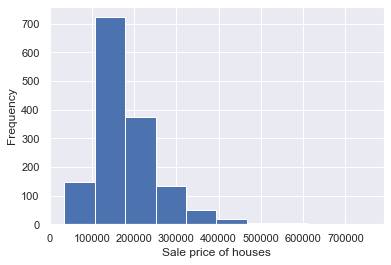

In [15]:
housing_df.SalePrice.plot.hist()
plt.xlabel("Sale price of houses")

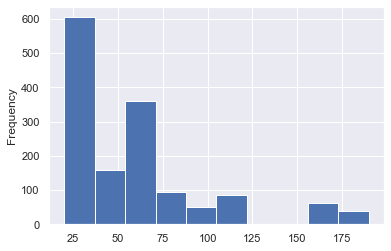

In [21]:
#housing_df.SalePrice.value_counts()
housing_df['MSSubClass'].plot.hist()

In [22]:
housing_df['MSSubClass'].dtype

dtype('int64')

In [24]:
building_type = {
        '20':'STORY 1946 & NEWER ALL STYLES',
        '30':'STORY 1945 & OLDER',
        '40':'STORY W/FINISHED ATTIC ALL AGES',
        '45':'1/2 STORY - UNFINISHED ALL AGES',
        '50':'1/2 STORY FINISHED ALL AGES',
        '60':'STORY 1946 & NEWER',
       '70':'STORY 1945 & OLDER',
        '75':'1/2 STORY ALL AGES',
        '80':'SPLIT OR MULTI-LEVEL',
        '85':'SPLIT FOYER',
        '90':'DUPLEX - ALL STYLES AND AGES',
       '120':'STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '150':'1/2 STORY PUD - ALL AGES',
       '160':'STORY PUD - 1946 & NEWER',
       '180':'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       '190':'2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

In [30]:
building_type['20']

'STORY 1946 & NEWER ALL STYLES'

### Data Preprocessing

In [5]:
housing_df['PoolQC'].isna().sum()

1453

In [27]:
housing_df['PoolQC'].isna().sum() / housing_df.shape[0]

0.9952054794520548

In [28]:
# Checking there is more than 70 % of data missing
threshold = 0.70
for column,element in housing_df.iteritems():
    if housing_df[column].isna().sum() / housing_df.shape[0] > threshold:
        print(column)

    

Alley
PoolQC
Fence
MiscFeature


##### Data Preprocessing for handling the missing values

In [60]:
housing_new = housing_df.copy()

In [211]:
# Making a function to remove the features if the missing values is 
# greater than 70%
def feature_less_than_threshold(df,threshold=0.7):
    for column, ele in df.iteritems():
        missing_per = housing_df[column].isna().sum()/housing_df.shape[0]
        if  missing_per > threshold:
            print(f'Droping features less than threshold: {column} with {missing_per:.3f} % missing values')
            df.drop([column],axis=1,inplace=True)

In [212]:
feature_less_than_threshold(housing_new)

Droping features less than threshold: Alley with 0.938 % missing values
Droping features less than threshold: PoolQC with 0.995 % missing values
Droping features less than threshold: Fence with 0.808 % missing values
Droping features less than threshold: MiscFeature with 0.963 % missing values


In [213]:
housing_new.shape

(1460, 76)

##### Handling the missing values 

In [214]:
housing_new.isna().sum()[housing_new.isna().sum() >0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [188]:
missing_columns = ['LotFrontage','MasVnrType','MasVnrArea','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'Electrical','FireplaceQu','GarageType','GarageYrBlt',
                   'GarageFinish','GarageQual','GarageCond']
#missing_columns[0]

In [18]:
housing_new[missing_columns].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [19]:
housing_new[missing_columns].describe(include='object')

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
count,1452,1423,1423,1422,1423,1422,1459,770,1379,1379,1379,1379
unique,4,4,4,4,6,6,5,5,6,3,5,5
top,None,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA
freq,864,649,1311,953,430,1256,1334,380,870,605,1311,1326


In [215]:
housing_new.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
#[ expression for item in list if conditional ]
#This is equivalent to:
'''
for item in list:
   if conditional:
       expression
'''

##### Handling numerical feature first

In [216]:
missing_num_feature =['LotFrontage','MasVnrArea','GarageYrBlt']
housing_new[missing_num_feature].isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [17]:
housing_new['LotFrontage'].describe() 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

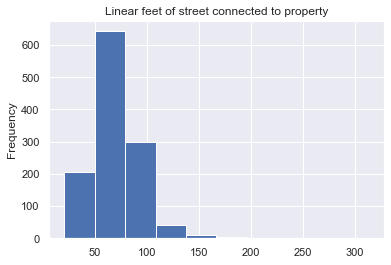

In [44]:
# Linear feet of street connected to property
housing_new['LotFrontage'].plot.hist()
plt.title('Linear feet of street connected to property')
plt.show()

In [19]:
count = 0
for ele,i in housing_new['LotFrontage'].iteritems():
   # print(ele,i)
    if i > 80:
        count+=1

print(count)

284


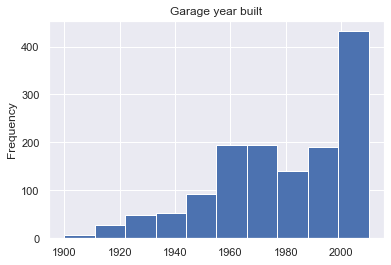

In [20]:
# Garange built year
housing_new['GarageYrBlt'].plot.hist()
plt.title("Garage year built")
plt.show()

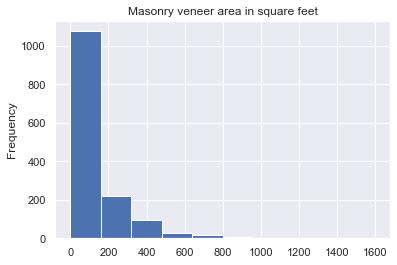

In [21]:
# Masonry veneer area in square feet
housing_new['MasVnrArea'].plot.hist()
plt.title('Masonry veneer area in square feet')
plt.show()

In [22]:
housing_new[missing_num_feature].dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [23]:
housing_new[missing_num_feature].fillna(housing_new[missing_num_feature].median())
housing_new[missing_num_feature].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1980.0
dtype: float64

In [24]:
housing_new[missing_num_feature].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1980.0
dtype: float64

In [217]:
# function for filling the missing values for numerical values
def fill_missing_values(df,columns):
    '''
    Filling the missing values in numeric feature
    '''
    housing_new[missing_num_feature]=housing_new[missing_num_feature].\
    fillna(housing_new[missing_num_feature].median())

In [218]:
fill_missing_values(housing_new,missing_num_feature)

In [219]:
housing_new.isna().sum()[housing_new.isna().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

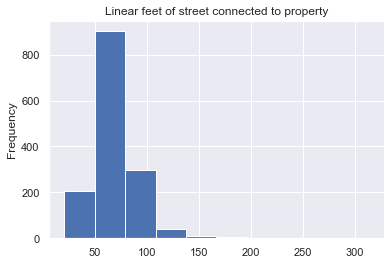

In [27]:
# Linear feet of street connected to property
housing_new['LotFrontage'].plot.hist()
plt.title('Linear feet of street connected to property')
plt.show()

##### Handling missing categorical values

In [220]:
housing_new.isna().sum()[housing_new.isna().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [ ]:
# Create bin according to fire placce quality 
#into two Poor/None or fair-Excellent
'''
# setting the conditions
conditions = [
    housing_new['FireplaceQu'].str.contains('Ex'),
    housing_new['FireplaceQu'].str.contains('Gd'),
    housing_new['FireplaceQu'].str.contains('TA'),
    housing_new['FireplaceQu'].str.contains('Fa'),
    housing_new['FireplaceQu'].str.contains('Po'),
    housing_new['FireplaceQu'].str.contains('NA')
]

# setting the choices for binning
choices = ['Fair-Excellent','Fair-Excellent',
           'Fair-Excellent','Fair-Excellent','No-Poor','No-Poor']

housing_new['Fire_Q_category'] = np.select(conditions,choices)
housing_new['Fire_Q_category'].value_counts()
'''

In [221]:
missing_cat_feature =['MasVnrType','FireplaceQu','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2',
'Electrical','GarageType','GarageFinish',
'GarageQual','GarageCond']
housing_new[missing_cat_feature].isna().sum()

MasVnrType        8
FireplaceQu     690
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [29]:
housing_new[missing_cat_feature].describe()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
count,1452,1423,1423,1422,1423,1422,1459,1379,1379,1379,1379
unique,4,4,4,4,6,6,5,6,3,5,5
top,None,TA,TA,No,Unf,Unf,SBrkr,Attchd,Unf,TA,TA
freq,864,649,1311,953,430,1256,1334,870,605,1311,1326


In [140]:
# No garage need to be added....
housing_new['GarageCond'].value_counts().idxmax()

'TA'

In [223]:
missing_cat_high_freq = ['Electrical','MasVnrType']

In [172]:
missing_cat_feature 

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [123]:
# function to replace missing values for categorical values
'''
# this one didn't worked as supposed to...

def filling_cat_values(df,columns,column_high_freq):
    """
    Function for filling missing values for categorical values with highest
    frequency and with another category 'NA'
    """
   
        
    df = df[list(set(columns).difference(column_high_freq))].fillna('NA')
    
    # substituting missing values with high frequency values
    for i in range(len(column_high_freq)):
        df = df[column_high_freq[i]].fillna(df[column_high_freq[i]].value_counts().\
                                      idxmax())
 '''   

In [128]:
list(set(missing_cat_feature).difference(missing_cat_high_freq))

['BsmtExposure',
 'GarageType',
 'BsmtFinType1',
 'GarageFinish',
 'GarageQual',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtQual',
 'GarageCond']

In [153]:
for i in range(len(missing_cat_high_freq)):
    print(housing_new[missing_cat_high_freq[i]].value_counts().\
                                      idxmax())
'''
# substituting missing values with high frequency values
for i in range(len(missing_cat_high_freq)):
    housing_new = housing_new[missing_cat_high_freq[i]].fillna(housing_new\
                                    [missing_cat_high_freq[i]].value_counts().\
                                    idxmax())
                                    
[[housing_new[col].value_counts()] for \
col in housing_new[missing_cat_feature] ]
'''

SBrkr
None


##### Using Imputer from Sklearn

In [225]:
from sklearn.impute import SimpleImputer

def filling_cat_missing_values(df,missing_cat_feature,missing_cat_high_freq):
    
    # Imputing the missing values with highest frequency
    imputer_with_high_freq = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    # Imputing the missing values with constant = 'Not avaiable'
    imputer_cat = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='Not Av')
    
    # Fit the imputer filling with high freq
    df[missing_cat_high_freq] = imputer_with_high_freq.fit_transform(df[missing_cat_high_freq])
    
    # Fit rest 
    rest_feature = list(set(missing_cat_feature).difference(missing_cat_high_freq))
    df[rest_feature] = imputer_cat.fit_transform(df[rest_feature])
    
    return df

In [226]:
housing_processed =filling_cat_missing_values(housing_new,missing_cat_feature,missing_cat_high_freq)

In [227]:
housing_processed.isna().sum()[housing_processed.isna().sum()>0]

Series([], dtype: int64)

#### Exporting the data after preprocessing1 

In [228]:
housing_processed.to_csv(r'data/housing-data/housing_processed_final.csv',index_label=False)

##### Read new pre-processed data

In [229]:
housing_preprocessed = pd.read_csv('data/housing-data/housing_processed_final.csv')
housing_preprocessed[:2].T

,1,2
MSSubClass,60,20
MSZoning,RL,RL
LotFrontage,65,80
LotArea,8450,9600
Street,Pave,Pave
LotShape,Reg,Reg
LandContour,Lvl,Lvl
Utilities,AllPub,AllPub
LotConfig,Inside,FR2
LandSlope,Gtl,Gtl


In [231]:
housing_preprocessed.isna().sum()[housing_preprocessed.isna().sum()>0]

Series([], dtype: int64)

##### Next steps:
As, in above section we have dealt with missing values, our next goal is:
* convert all the categorical features into numeric to make the data ready for the model
* save the algorithm ready data into csv file
* load the data and  split the it into X & y
* Train the model 
* Test the accuracy of the trained model

##### Converting all the features with str into Categorical

In [233]:
type(housing_preprocessed['SaleCondition'])

pandas.core.series.Series

In [234]:
housing_preprocessed['SaleCondition'].dtype

dtype('O')

In [235]:
pd.Categorical(housing_preprocessed['SaleCondition']).dtype

CategoricalDtype(categories=['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal',
                  'Partial'],
                 ordered=False)

In [236]:
pd.Categorical(housing_preprocessed['SaleCondition']).codes

array([4, 4, 4, ..., 4, 4, 4], dtype=int8)

##### Finding all the columns containing string values

In [237]:
print('Features with String datatypes:')
for label,content in housing_preprocessed.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Features with String datatypes:
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


##### Converting all the string values into category values

In [264]:
for label, content in housing_preprocessed.items():
    if pd.api.types.is_string_dtype(content):
        housing_preprocessed[label] = content.astype('category').cat.as_ordered()

In [265]:
housing_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null c

In [240]:
housing_preprocessed.SaleCondition.cat.categories

Index(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'], dtype='object')

In [242]:
housing_preprocessed.SaleCondition.cat.codes;

In [243]:
housing_preprocessed.SaleCondition.cat.codes.value_counts()

4    1198
5     125
0     101
3      20
2      12
1       4
dtype: int64

In [244]:
len(housing_preprocessed)

1460

##### Save processed data

In [266]:
housing_preprocessed.to_csv(r'data/housing-data/housing_final_preprocessed.csv',index_label=False)

In [68]:
housing_final_processed = pd.read_csv(r'data/housing-data/housing_final_preprocessed.csv')

##### Building an evaluation function

In [69]:
# Create evaluation function (the competition used RMSE between 
#log of predicted and observe sale price.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse_of_log_pre_and_obs(y_test,y_preds):
    """
    Calculates root mean squared error between log of predicted and observed sale price
    """
    return np.sqrt(mean_squared_error(np.log(y_test),np.log(y_preds)))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = { "Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_valid,val_preds),
              "Training RMSE log": rmse_of_log_pre_and_obs(y_train,train_preds),
              "Valid RMSE Log": rmse_of_log_pre_and_obs(y_valid,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_valid,val_preds)}
    
    return scores

In [270]:
pd.Categorical(housing_final_processed.SaleCondition).codes

array([4, 4, 4, ..., 4, 4, 4], dtype=int8)

##### Turning categorical into numbers

In [70]:
for label,content in housing_final_processed.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turning categories into numbers
        housing_final_processed[label] = pd.Categorical(content).codes

In [71]:
# Create X and y
X = housing_final_processed.drop('SalePrice',axis=1)
y= housing_final_processed.SalePrice
len(X),len(y)

(1460, 1460)

In [72]:
# Create train and validation datasets
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((1168, 75), (1168,), (292, 75), (292,))

##### Train the model

In [278]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

In [279]:
%%time
model.fit(X_train,y_train)

Wall time: 358 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [282]:
show_scores(model)

{'Training MAE': 6558.3916352739725,
 'Valid MAE': 17500.390410958906,
 'Training RMSE log': 0.05950240566829599,
 'Valid RMSE Log': 0.15243811123920822,
 'Training R^2': 0.9794966095663519,
 'Valid R^2': 0.898539906224558}

##### Hyperparameter tuning with RandomizedSearchCV

In [286]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,'sqrt','auto']}

# instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=100,
                             cv=10,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 3min 26s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

**Finding the best params**

In [289]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [290]:
show_scores(rs_model)

{'Training MAE': 8758.143904919934,
 'Valid MAE': 17491.092389525427,
 'Training RMSE log': 0.07927247209917984,
 'Valid RMSE Log': 0.16455494619612934,
 'Training R^2': 0.9620492458742227,
 'Valid R^2': 0.868229307508818}

As, the RandomizedSearchCV doesn't result in better model than the base model. There are if other steps:
* try rigorous GridSearchCV
* try Xboost or Gradient boosting

So, for now we're save the `base model` for predicting the test data later.

**Save th model**

In [3]:
import joblib

filename = "randomForestRegressor_housing.sav"

In [ ]:
# save the model to disk
joblib.dump(model,filename)

Improving the hyperparameter of the model
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [4]:
loaded_model = joblib.load(filename)

##### Preprocessing the data as well

In [19]:
from sklearn.impute import SimpleImputer

# whole function for preprocessing the test data
def preprocess_data(df,extra_cat_NA):
    """
    Perform transformations on df and returns transformed df
    """
    
    # fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())
            
        # fill the categorical missing data and turn categories into numbers
        elif not pd.api.types.is_numeric_dtype(content):
            # always add +1 in the code category if there is missing values
            # as missing values is interpret as -1
            
            # if the categories has missing category as NA, 
            # which means with the characteristic
            if label in extra_cat_NA:
                imputer_cat = SimpleImputer(missing_values=np.nan,
                                         strategy='constant',
                                          fill_value='Not Av')
                # fit and transform the imputer
                df[label] = imputer_cat.fit_transform(df[[label]])
                # 
            else:
                imputer_with_high_freq = SimpleImputer(
                                            missing_values=np.nan,
                                            strategy='most_frequent')
                #fit and transform the imputer
                df[label] = imputer_with_high_freq.fit_transform(df[[label]])
            
            # after filling missing values, converting cat to numeric
            df[label] =pd.Categorical(content).codes
                
            

In [6]:
housing_test = pd.read_csv(r'E:\DS\files\data\house-prices-advanced-regression-techniques\test.csv',index_col='Id')
housing_test[:2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [8]:
housing_test.shape

(1459, 79)

In [7]:
housing_test.isna().sum()[housing_test.isna().sum() >0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [17]:
missing_NA_cat = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

In [10]:
dropped_feature = ['Alley','PoolQC', 'Fence','MiscFeature']

In [22]:
# working with copy of the test data
housing_tmp = housing_test.copy()

In [24]:
#dropping the feature from the test
housing_tmp.drop(dropped_feature,axis=1,inplace=True)

In [26]:
preprocess_data(housing_tmp,missing_NA_cat)

In [29]:
housing_tmp.isna().sum()[housing_tmp.isna().sum()>0]

Series([], dtype: int64)

In [37]:
housing_tmp.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [39]:
'''
Throws KeyError as `Id` is used as index column
'''
#housing_tmp['Id']

##### Predicting on test data using the trained model

In [30]:
test_preds = loaded_model.predict(housing_tmp)

In [31]:
test_preds

array([125421.33, 155689.75, 176200.85, ..., 156077.87, 117442.25,
       225491.44])

In [38]:
# Formattting the predictions according to Kaggle submission
df_preds = pd.DataFrame()
# As `Id` is used as index column
df_preds['Id'] = housing_tmp.index
df_preds['SalePrice'] = test_preds
df_preds[:5]

,Id,SalePrice
0,1461,125421.33
1,1462,155689.75
2,1463,176200.85
3,1464,187656.85
4,1465,208661.47


##### Exporting the predicted SalePrice of the house for the test 

In [48]:
df_preds.to_csv('data/housing_test_preds.csv',index=False)

In [49]:
df = pd.read_csv('data/housing_test_preds.csv')
df.head()

,Id,SalePrice
0,1461,125421.33
1,1462,155689.75
2,1463,176200.85
3,1464,187656.85
4,1465,208661.47


### Test with optimized parameters for validation data

In [67]:
rf_optimized_model = RandomForestRegressor(n_estimators=800,
                                          random_state=42,
                                          min_samples_leaf=1,
                                          min_samples_split=5,
                                          max_features='sqrt',
                                          max_depth=90,
                                          bootstrap=False)

In [73]:
rf_optimized_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [74]:
show_scores(rf_optimized_model)

{'Training MAE': 2584.103937107594,
 'Valid MAE': 16828.949646475463,
 'Training RMSE log': 0.0263982097361258,
 'Valid RMSE Log': 0.1566183001532436,
 'Training R^2': 0.9964244594165751,
 'Valid R^2': 0.8896250704635661}